Assignment on Classification
Do the following in the iris dataset
1. Read the dataset to python environment
2. Do the necessary pre-processing steps
3. Find out which classification model gives the best result (try all the classification algorithms discussed in the session)

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,precision_score,accuracy_score,recall_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Reading the data file

In [2]:
data=pd.read_excel('iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Checking the number of rows and columns

In [3]:
data.shape

(150, 5)

150 rows and 5 columns

Checking the name of columns

In [4]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

Describing the data

In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Checking for missing values

In [6]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are missing values in SL, SW and PL

Checking the distribution of data

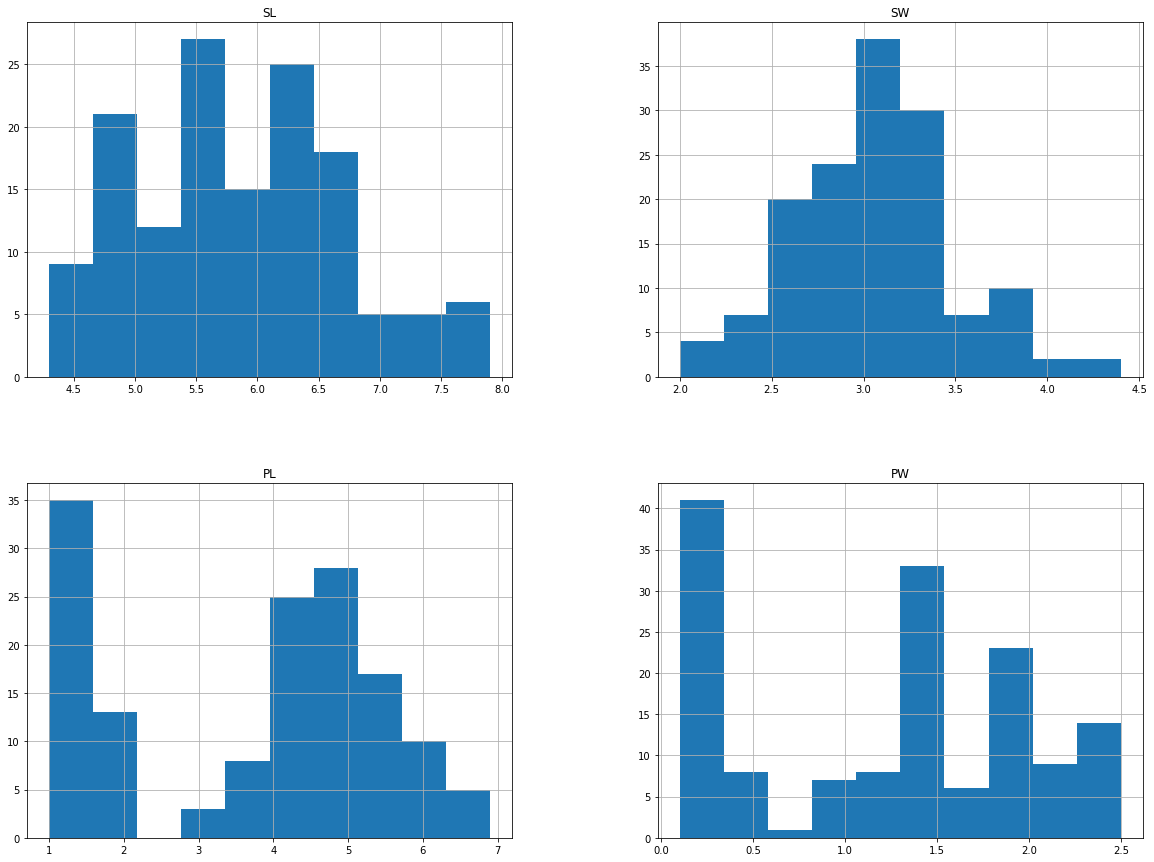

In [7]:
data.hist(figsize=(20,15))
plt.show()

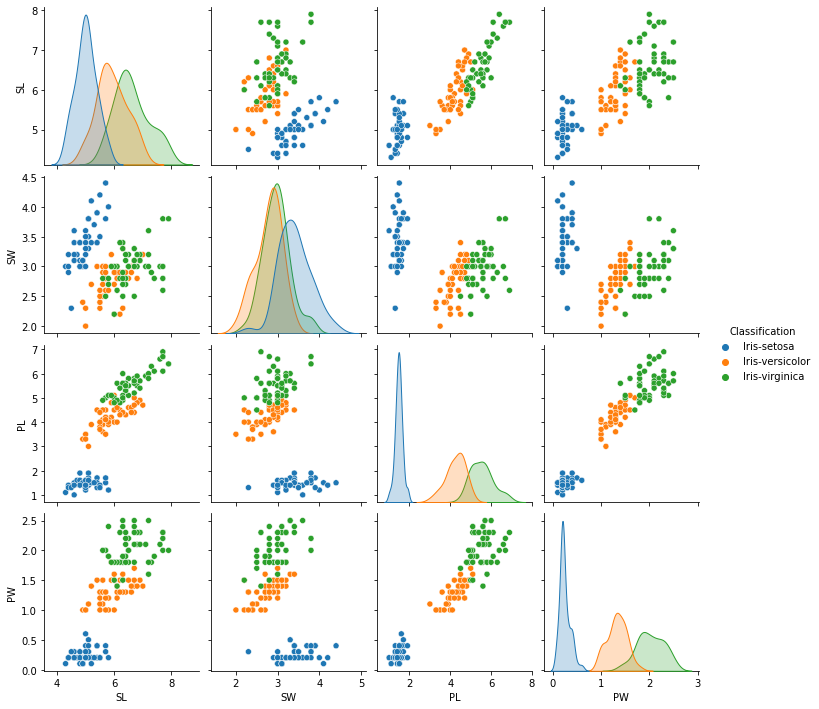

In [8]:
sns.pairplot(data,hue='Classification')

The missing value can be filled with Median value

In [9]:
data['SL'].fillna(data['SL'].mean(),inplace=True)
data['SW'].fillna(data['SW'].mean(),inplace=True)
data['PL'].fillna(data['PL'].mean(),inplace=True)

In [10]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

All missing values were filled with mean

Checking the info of columns 

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Checking and removing duplicate values

In [12]:
data[data.duplicated()]

,SL,SW,PL,PW,Classification
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


There are some duplicate values which needs to be removed.

In [13]:
data.drop_duplicates(inplace = True)
data[data.duplicated()]

,SL,SW,PL,PW,Classification


Checking correlation between features

In [14]:
rel=data.corr()

Heatmap of correlation

<AxesSubplot:>

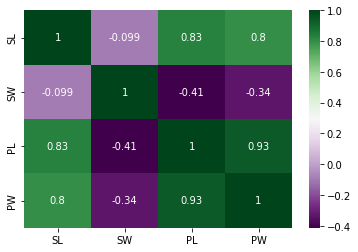

In [15]:
sns.heatmap(rel,cmap='PRGn',annot=True)

Label encoding the classification feature

In [16]:
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])

In [17]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


Checking for outliers

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


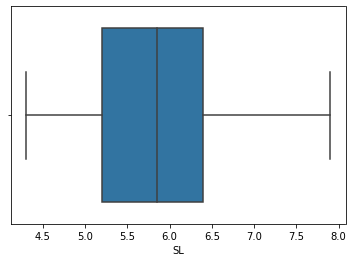

In [18]:
sns.boxplot(data['SL'])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


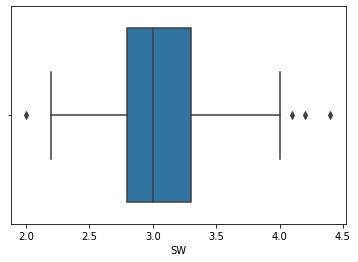

In [19]:
sns.boxplot(data['SW'])
plt.show()

There are outliers inside SW. Removing outlier by replacing with mean

In [20]:
Q1=data['SW'].quantile(0.25)
Q3=data['SW'].quantile(0.75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
data.loc[data.SW>upper_limit]

,SL,SW,PL,PW,Classification
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0


replacing the outliers with median

In [21]:
data.loc[data.SW>upper_limit,'SW']=np.median(data.SW)
data.loc[data.SW>upper_limit]

,SL,SW,PL,PW,Classification


In [22]:
data.loc[data.SW<lower_limit]

,SL,SW,PL,PW,Classification
60,5.0,2.0,3.5,1.0,1


In [23]:
data.loc[data.SW<lower_limit,'SW']=np.median(data.SW)
data.loc[data.SW<lower_limit]

,SL,SW,PL,PW,Classification


In [24]:
print(np.median(data.SW))

3.0


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


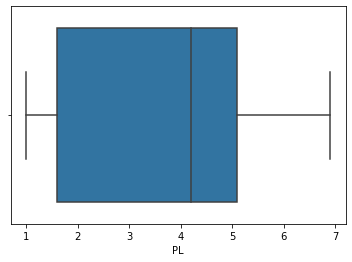

In [25]:
sns.boxplot(data['PL'])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


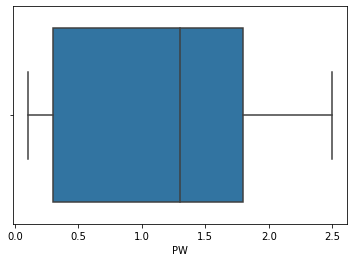

In [26]:
sns.boxplot(data['PW'])
plt.show()

There are no outliers in any other columns

Generating the test and train data

In [27]:
x=data.drop(['Classification'],axis=1)
y=data[['Classification']]
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

Logistic Regression Modeling

In [28]:
LR=LogisticRegression()
LR=LR.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicting the Y value using the model

In [29]:
y_pred=LR.predict(x_test)

Find the aaccuracy of the model

In [30]:
print('Accuracy = ',accuracy_score(y_test,y_pred))

Accuracy =  0.9459459459459459


Finding the precision of the model

In [31]:
from numpy.lib.function_base import average
print('Precission = ',precision_score(y_test,y_pred,average='micro'))

Precission =  0.9459459459459459


Finding the recall of the model

In [32]:
print('Recall = ',recall_score(y_test,y_pred,average='micro'))

Recall =  0.9459459459459459


Finding the confusion matrix

In [33]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  8,  2],
       [ 0,  0, 13]])

KNN Model

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

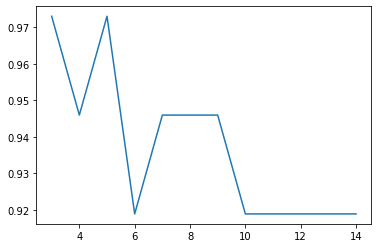

In [34]:
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k , metric ='euclidean')
  classifier.fit(x_train,y_train)
  y_pred1=classifier.predict(x_test)
  acc1 = accuracy_score(y_test,y_pred1)
  metric_k.append(acc1)
plt.plot(neighbors,metric_k)
plt.xlabel='K'
plt.ylabel='Accuracy'
plt.show()

Maximum accuracy when k=3 or 5

In [35]:
classifier=KNeighborsClassifier(n_neighbors=5 , metric ='euclidean')
classifier.fit(x_train,y_train)
y_pred2=classifier.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for KNN

In [36]:
print('Accuracy = ',accuracy_score(y_test,y_pred2))

Accuracy =  0.972972972972973


Precision for KNN

In [37]:
print('Precission = ',precision_score(y_test,y_pred2,average='micro'))

Precission =  0.972972972972973


Recall for KNN

In [38]:
print('Recall = ',recall_score(y_test,y_pred2,average='micro'))

Recall =  0.972972972972973


Confusion matrix for KNN

In [39]:
confusion_matrix(y_test,y_pred2)

array([[14,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 13]])

SVM Method

Kernel = Linear

In [40]:
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)
y_pred3=svm_cls.predict(x_test)
print('Accuracy = ',accuracy_score(y_pred3,y_test))
confusion_matrix(y_pred3,y_test)

Accuracy =  0.9459459459459459


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[14,  0,  0],
       [ 0,  8,  0],
       [ 0,  2, 13]])

Kernel = RBF

In [41]:
svm_cls1=SVC(kernel='rbf')
svm_cls1=svm_cls1.fit(x_train,y_train)
y_pred4=svm_cls1.predict(x_test)
print('Accuracy = ',accuracy_score(y_pred4,y_test))
confusion_matrix(y_pred4,y_test)

Accuracy =  0.972972972972973


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 13]])

Decision Tree

In [42]:
dt_cls=DecisionTreeClassifier()
dt_cls=dt_cls.fit(x_train,y_train)
y_pred5=dt_cls.predict(x_test)
print('Accuracy = ',accuracy_score(y_pred5,y_test))
confusion_matrix(y_pred5,y_test)

Accuracy =  0.918918918918919


array([[14,  0,  0],
       [ 0,  9,  2],
       [ 0,  1, 11]])

Random Forest

In [43]:
rf_cl=RandomForestClassifier()
rf_cl=rf_cl.fit(x_train,y_train)
y_pred6=rf_cl.predict(x_test)
print('Accuracy = ',accuracy_score(y_pred6,y_test))
confusion_matrix(y_pred6,y_test)

<ipython-input-43-46d10f30222d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_cl=rf_cl.fit(x_train,y_train)


Accuracy =  0.9459459459459459


array([[14,  0,  0],
       [ 0,  9,  1],
       [ 0,  1, 12]])

KNN and SVM (Kernel = rbf) have the highest accuracy among all the algorithms. 